# Walk Through II

**1) arrays**

In order to perform numerical operations, we mostly will work with numpy arrays. First, let us call the numpy library:

In [9]:
import numpy as np

Type np. and use the tab:<br>
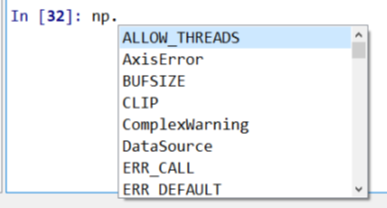

Let us experiment a bit with the functions of numpy:

In [13]:
a = 2
b = 3
c = 2*a 
#
print(a*b)
print(a**b)
print(np.exp(a))
print(np.power(c,3))
print(np.log(a))

6
8
7.38905609893065
64
0.6931471805599453


We can perform any matrix multiplication or vector multiplication using numpy:

In [16]:
v1 = np.array([1,5,0,-3])
v2 = np.array([3,-1,2,2])
#
#
print(v1 + v2)
print(v1 + 2)
print(v1*2)		
print(v1*v2)
print(np.dot(v1,v2)) 
print(np.outer(v1,v2))

[ 4  4  2 -1]
[ 3  7  2 -1]
[ 2 10  0 -6]
[ 3 -5  0 -6]
-8
[[ 3 -1  2  2]
 [15 -5 10 10]
 [ 0  0  0  0]
 [-9  3 -6 -6]]


In [18]:
M1 = np.array([[1,3,5,7], [0,5,6,-2]])
M2 = np.array([[4,-3,8,0], [11,2,3,-2]])
#
print(np.multiply(M1,M2))

[[ 4 -9 40  0]
 [ 0 10 18  4]]


In [20]:
print(np.multiply(M2,M1))

[[ 4 -9 40  0]
 [ 0 10 18  4]]


Check out the next line of code. Why does it prompt an error message?

In [77]:
print(np.multiply(M2, M1.transpose()))

ValueError: operands could not be broadcast together with shapes (2,4) (4,2) 

In order to make sure that you perform the correct matrix operation, you might want to check the *shape* of an array:

In [25]:
print(M2.shape)

(2, 4)


The shape is returned as an tuple:

In [29]:
type(M2.shape)

tuple

Now it works:

In [82]:
print(np.multiply(M2.transpose(), M1.transpose()))

[[ 4  0]
 [-9 10]
 [40 18]
 [ 0  4]]


**2) loops**

For repetitive tasks we write a so called *for* loop. Any loop contains an *expression* and a set of *statements*. We will encounter *if* and *while* loops during the course. Let us begin with a common *for* loop.
Let's say we have a list L

In [40]:
L = ['a', 'b', 'c', 'd', 'e']

and we like to print each element of the list. Naively, we would write down the following code:

In [42]:
print(L[0])
print(L[1])
print(L[2])

a
b
c


...and so on. This is pretty tedious, especially if L is large. Thus, we write a loop: 

In [45]:
for i in L:
	
	print(i)

a
b
c
d
e


The phrase *for i in L:* is the *expression* and *print(i)* is called *statement*. The variable *i* is a free index, like the *i* or *k* in a sum or in a product. Therefore, it doesn't matter how we call the variable *i*.  

In [48]:
for k in L:
	
	print(k)

a
b
c
d
e


The *for* loop has to run over a so called *iterable*, like *list*, *tuple*, *array* or *data frame*. According to that logic, the following loop works:

In [53]:
for i in range(5):
	
	print(i)

0
1
2
3
4


but the next loop will prompt an error message:

In [56]:
for i in 5:
	
	print(i)

TypeError: 'int' object is not iterable

Python has a very flexible syntax that allows us to write loops almost the way we would phrase the problem which we'd like to solve in actual English. For example, consider a string

In [66]:
S = "My God, It's Full of Stars"

and we want to know if *S* contains the word *"Stars"*. The corresponding *if* loop reads 

In [68]:
if 'Stars' in S:
    print('yes')

yes


whereas

In [71]:
if 'Planets' in S:
    print('yes')

does not generate an output.

We can also iterate over more than one *iterable* at once, using *zip*:

In [88]:
A = ['a', 'b', 'c', 'd', 'e']
B = np.arange(0,4,2)

for a, b in zip(A, B):
    	print(str(a) + ' and ' + str(b))

a and 0
b and 2


As you might have noticed that the *iterables* even **don't need to have the same length**. Python just stops when the end of the shortest *iterable* has been reached.

Using the command *enumerate* we can iterate over the **content** and the **index** of an *interable* **simultaneously**.

In [93]:
for i, s in enumerate(S):
    print(s + str(i))

M0
y1
 2
G3
o4
d5
,6
 7
I8
t9
'10
s11
 12
F13
u14
l15
l16
 17
o18
f19
 20
S21
t22
a23
r24
s25


And of course, we can combine *enumerate* and *zip*.

In [100]:
for i, (a, b) in enumerate(zip(A, B)):
    	print(str(i) + str(b) + a)

00a
12b


There are different ways to make a loop faster. One strategy is to avoid *for* loops as far as possible by using *lambda* or *map* (see later). Another strategy is called *comprehension*.<br>
Say, we'd like to extract all *indices* of the letter "l" in S. The standard way would be

In [104]:
L = [] #creating an empty list to store indices
for i, s in enumerate(S):
    if s == 'l':
        L += [i]
print(L)

[15, 16]


But the *"pythonian"* way is

In [107]:
L = [i for i, s in enumerate(S) if s == 'l']
print(L)

[15, 16]


Writing everything in one line is **more compact** and **faster**. Let's test the speed of the loops by running them 1,000,000 times and measure the time using the library *datetime*.

In [112]:
from datetime import datetime
#
t1 = datetime.now()

for i in range(1000000):
    L = [] #creating an empty list to store indices
    for i, s in enumerate(S):
        if s == 'l':
            L += [i]

t2 = datetime.now()
dt = (t2 - t1)
print("Runtime: " + str(dt)) 

Runtime: 0:00:02.014548


versus

In [114]:
t1 = datetime.now()

for i in range(1000000):
    L = [i for i, s in enumerate(S) if s == 'l']

t2 = datetime.now()
dt = (t2 - t1)
print("Runtime: " + str(dt)) 

Runtime: 0:00:01.154969


Comprehension saves you a factor of two in time!<br>
Note, it is ok if you start with a standard loop structure. Most importantly your code should work! But consider applying comprehension more and more often during the course of the semester.<br>

**3) functions**<br>
<br>
A even more compact - and also more generic-  form is to create a *function*. There are different ways to do write a function in Python.<br>
<br>
*a) lambda*

Say, we would like to create a list of indices of the letter *l* from any given string *S*. For that purpose, we can create an *anonymus* function using the keyword *lambda*. The syntax has the structure<br>
*lambda arguments: expression*<br>
Thus, by just copying the above expression, we create the *function* "Find_l" by 

In [136]:
Find_l = lambda S: [i for i, s in enumerate(S) if s == 'l']

We can now run *Find_l* for any sequence S:

In [141]:
S1 = "All men must die."
S2 = "The North remembers."
S3 = "The night is dark and full of terrors."

In [143]:
Find_l(S1)

[1, 2]

In [145]:
Find_l(S2)

[]

In [147]:
Find_l(S3)

[24, 25]


*b) map* <br>


What if we want to search all these sequences at once and store the output in one list? For that purpose, we use the *command* "map", that maps an *argument* to a function. The syntax is<br>
*map(function, iterable)*

The command *map* creates an output that has to be converted into a *list*. Let's try that with our sequences.

In [160]:
Out = map(Find_l, [S1, S2, S3])
print(list(Out))

[[1, 2], [], [24, 25]]


Imagine how many lines of code that would have required using standard loops! 


*c) def* <br>

The most common version is to define a *function* using the command (or *"constructor"*) *def*.<br> 
The syntax is:<br>

def Myfunction(input1, input2, ...):
    statements

    return output1, output2, ...

Let us start with a relatively simple example of some physical relevance. We would like to calculate the time dilation $\Delta t$ for a given time span $\Delta t_0$ near a non-rotating Black Hole of a certain mass $M$. Let us denote the distance to the Black Hole as $r$.<br>
There are three inputs: $\Delta t_0$, $r$ and $M$<br>
and one output: $\Delta t$. <br>
The corresponding equation is<br>

$\Delta t = \frac{\Delta t_0}{\sqrt{1 - \frac{r_s}{r}}}$ <br>

where<br> 

$r_s = \frac{2\,G\,M}{c^2}$

Therefore, the function might look like this:

In [267]:
def Time_Dil(t_0, r, M):
    M   = M * 1.98*1e+30 #M in solar masses
    r   = r*1000 # km --> m
    G   = 6.676*1e-11
    c   = 3*1e+8
    r_s = 2*G*M/(c**2)

    delt = t_0/np.sqrt(1 - r_s/r)

    return delt

Let's try it! Imagine we were just **18,000km** away from a Black Hole which has **5000 solar masses** and we spent **1hr** there. How much time would have elapsed for a distant observer, say on Earth?

In [271]:
result = Time_Dil(60 * 60, 1.8e+4, 5000)
print(result/3600)

2.330980518212437


The result is more than 2hrs!

Run the function for the "Gargantula" Black Hole (100 Million solar masses) and Miller's planet (r = 293.8 Mio km) from the movie "Interstellar". 

In [274]:
result = Time_Dil(60 * 60, 2.938e+8, 1e+8)
print(result/3600)

72.43223433962136


It is more than 70hrs! Compare that value to the result in the movie (7yrs). What might have been different in the movie?

Let us now write a function that calculates the distance $\bar{x}$ that we can jump from a certain height $h_0$, i. e. if we jump off a cliff into the ocean.<br>

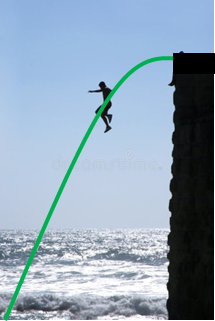

The corresponding equations are:<br>

$\bar{x} = \frac{v_0\, cos\alpha}{g}\,\left[ v_0\,sin\alpha + \sqrt{(v_0\,sin\alpha)^2 + 2\,g\,h_0} \right]$

$y(x) = -\frac{g}{2}\frac{x^2}{(v_0\,cos\alpha)^2} + x\,tan\alpha + h_0$

Where $v_0$ is the initial speed, $g$ the gravitational acceleration on Earth's surface and $\alpha$ is the jump angle wrt Earth's surface.

We can set $g = 9.81 \frac{m}{s^2}$ and $\alpha = 0$ as default values for now. The function could look like 

In [259]:
def Jump1(v_0, h_0, g = 9.81, alpha = 0):
    
    #degrees to rad
    alpha  = alpha * np.pi/ 180
    
    #calculating x
    vsin   = v_0 * np.sin(alpha)
    vcos   = v_0 * np.cos(alpha)
    
    x_bar  = (vcos/g) * (vsin + np.sqrt(vsin**2 + 2*g*h_0))
    
    x_plot = np.arange(0, x_bar, x_bar/100)
    
    y       = (-0.5 * g *x_plot**2)/ ((v_0*np.cos(alpha))**2)\
              + np.tan(alpha) * x_plot + h_0
        
    #plt.plot(x_plot, y, '--', color = 'k', label = r'$v_{0}$ = ' + str(v_0) +'m/s')
    #plt.xlabel('distance [m]')
    #plt.ylabel('height [m]')
    #plt.legend()
    #plt.show()
    
    print(f'Distance is: {x_bar:.3f}m')
    
    return x_bar#, x_plot

In [261]:
Jump1(10,30)

Distance is: 24.731m


24.730968341474895

<br>

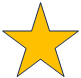
Write a new function, Jump2, based on Jump1, that also takes a vector of $v_0$ and $h_0$ and plots the trajectory for all those values. The result should look like this:<br>
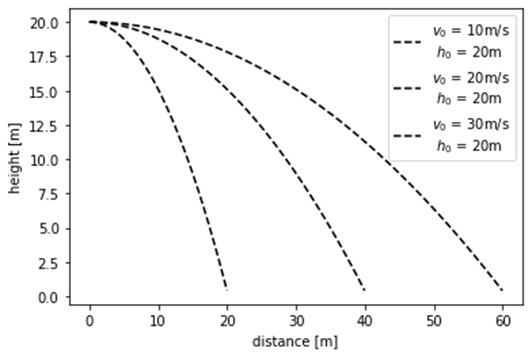

<br>

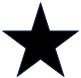
Write a new function, Jump3, based on Jump2, that also takes a keyword argument for creating the plot that shows the trajectories. Put all three functions in a module named *Jump*. The result should look like this:

In [ ]:
from Jump import *

[out1, out2] = Jump3([5, 10, 30], [50, 20, 10], plot = 'no')

In [ ]:
[out1, out2] = Jump3([5, 10, 30], [50, 20, 10], plot = 'yes')

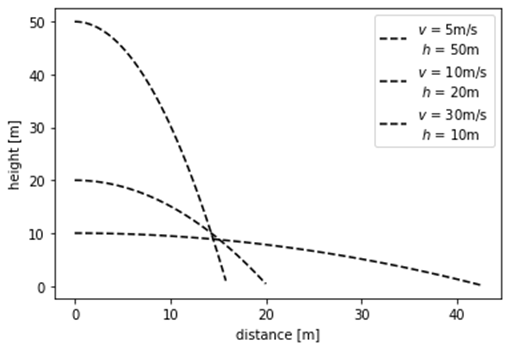

As an additional exercise, write the code with full annotation.